<a href="https://colab.research.google.com/github/Ankush11-hash/simple-_project/blob/master/eCommerce_Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**eCommerce Sales Analytics**

**Problem Statement**

Advise a eCommerce company that sells clothing online.

The Company is trying to decide whether to focus on mobile app or website

Find the correlations between different factors and how they affect on how much the customer spends.

---



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/payutech/myecommercecustomersdata/master/EcommerceCustomers.csv')
df.shape

(500, 8)

In [0]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [0]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [0]:
df.corr()
# seeing the correlation

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccbcd34f28>,
      dtype=object)

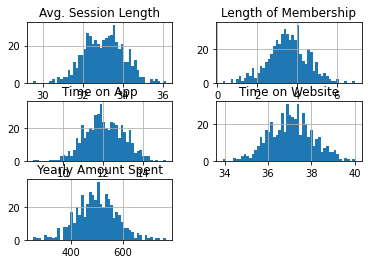

In [0]:
%matplotlib inline
df.hist(bins=50,grid=True)# Data is not skewwed on either side ,therefore preprocessing could be left.

<Figure size 432x432 with 0 Axes>

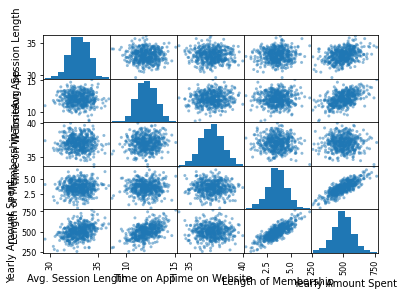

In [0]:
# ploting the scatter ploting
%matplotlib inline
plt.figure(figsize=(6,6))
scatter_matrix(df)
plt.show()
# it Could be seen that Length of Membership and Time on App shows clearly a postive corelation.Therefore we could use this our features.

As we can see **Amount** is  majorly impacted  by **Length of Membership**,**Time on App** and **Avg.Session length** in decending ordering and has aa positive correlation.
Whereas, **Time on Website** shows a negative correlation .


In [0]:
df['Area'] = df['Address'].str.extract('([A-Z]{2})',expand=True)

In [0]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Area
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR


# Visualizing the the Area imoact on time spent.

**Generally trying to see whether Area has a effect on people spending time on App,web or duration of Membership**

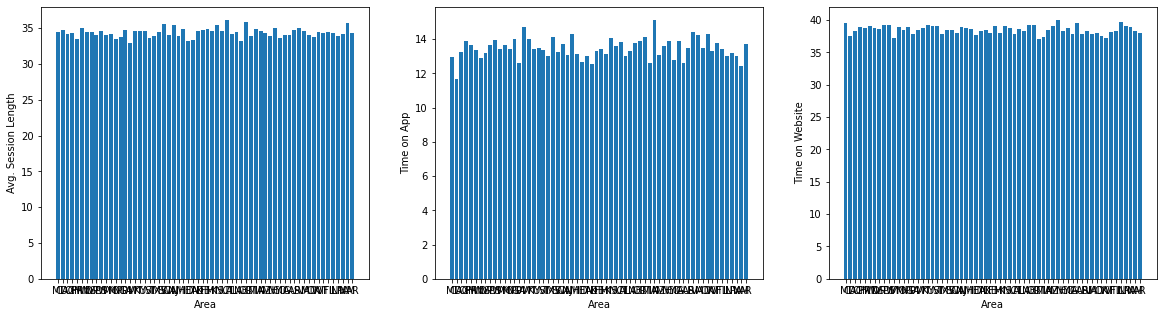

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(x=df['Area'],height=df['Avg. Session Length'])
plt.ylabel('Avg. Session Length')
plt.xlabel('Area')
plt.subplot(132)
plt.bar(x=df['Area'],height=df['Time on App'])
plt.ylabel('Time on App')
plt.xlabel('Area')
plt.subplot(1,3,3)
plt.bar(x=df['Area'],height=df['Time on Website'])
plt.ylabel('Time on Website')
plt.xlabel('Area')

plt.show()


This could be seen that there no effect of Area on the **Avg session Length,Time on app and Time on Website**.




In [0]:
from sklearn.model_selection import train_test_split
X_app= df[['Avg. Session Length','Time on App','Length of Membership',]]
X_web= df[['Avg. Session Length','Time on Website','Length of Membership']]
X = df[['Avg. Session Length','Time on App','Length of Membership','Time on Website']]
y = df['Yearly Amount Spent']
X_tr,X_te,y_tr,y_te = train_test_split(X_app,y,test_size=.20,random_state=2)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_tr,y_tr)
score_lr= lr.score(X_tr,y_tr)
yhat = lr.predict(X_te) 
print('Score = ',score_lr)
mse = np.sqrt(mean_squared_error(yhat,y_te))
mse

Score =  0.9841310184462995


10.041160448792803

In [0]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor(random_state=0)
rnd.fit(X_tr,y_tr)
print('score_rnd',rnd.score(X_tr,y_tr))
yhat = rnd.predict(X_te)
mse = np.sqrt(mean_squared_error(y_te,yhat))
print('MSE_rnd ', mse)
from sklearn.model_selection import cross_val_score
score = cross_val_score(rnd,X_tr,y_tr,cv=5, scoring='neg_mean_squared_error')
mse_crss = np.sqrt(-score)
print("mse_crss ",mse_crss)
print('Avg of mse_crss ',np.mean(mse_crss))
# since the model is not over fitting because of the avg_cross_val_score is somewhat equals to score_rnd

score_rnd 0.991587258182995
MSE_rnd  19.33159511690697
mse_crss  [20.59928371 21.93589735 21.15921858 15.34734403 17.93644373]
Avg of mse_crss  19.395637479624316




---


**Since our main motive is to determine which platform would be better for eCommerce company to pitch its product and the goals is clear we should go for App based platform .**




---




Our both the models performed well but **Random forest** shows good fitting with a score of **.9915** and giving a avg mse of **19.39** , so we keep Random forest for this problem set.**


---
Below there are some more insight we get from Linear Regression
---





1.   When features:- **'Avg. Session Length','Time on App','Length of Membership'**


*   Fitting score:  0.9841310184462995
*   **MSE**          : 10.041160448792803 


2.   When features:- **'Avg. Session Length','Time on web','Length of Membership'**


*  **Fitting score**: 0.7364353689495247

*   **MSE**          : 36.449258777203230
 

Clearly App should be recommend usage of App based not website based.